In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'

## Import Dataset

In [13]:
# Crescent Full-Moon Dataset
dataset = np.loadtxt("dataset/crescentfullmoon.csv", delimiter=",")
np.random.shuffle(dataset)

array([[  6.3951953 , -12.82470996,   1.        ],
       [ -6.28063621, -13.25593025,   1.        ],
       [  5.27691056, -10.09334981,   1.        ],
       ...,
       [ -2.23362479,   2.96456364,   0.        ],
       [  4.81667872, -13.83575981,   1.        ],
       [-13.98545443,  -4.4136358 ,   1.        ]])

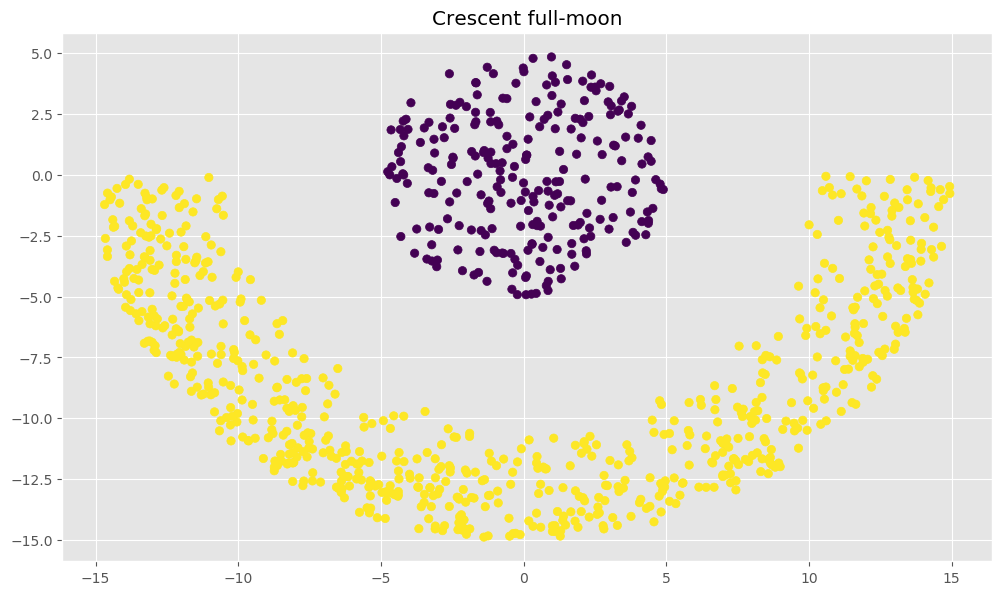

In [15]:
plt.figure(dpi = 100)
plt.scatter(dataset[:,0],dataset[:,1], c=dataset[:,2])
plt.title("Crescent full-moon")
plt.show()

## Define activation function 
### 1. ReLU 

In [16]:
def relu(x):
    z = np.zeros_like(x)
    return np.fmax(x, z)

def delta_relu(x):
    res = relu(x)
    return (res > 0).astype(int)

### 2. Softmax

In [17]:
def softmax(X):
    # Subtract max(y) for numerical stability
    X = X - np.max(X, axis=0)
    X = np.exp(X)
    return X / np.sum(X, axis=0)

### Initialize Weight and Bias

In [46]:
def initialize(X, y, dims):
    # Takes a list 'dims' as input containing number of Units(Neurons) at each layer, the len(dims) gives the number of hidden layer 
    # and returns a list of "Weights" and "Biases" as a tuple
    # X shape: [batch, input_units]
    input_units = X.shape[1]
    output_units = y.shape[1]
    dims = [input_units] + dims + [output_units]
    
    # Choose random weights and biases
    params = []
    for i in range(len(dims)-1):
        # Weight shape: [input_units, output_units]
        W = np.random.random((dims[i], dims[i+1]))
        # Bias shape: [output_units, 1]
        b = np.random.random((dims[i+1], 1))
        params.append((W,b))
    return params

In [47]:
'''
W = np.array([[0.5,0.5],
              [0.5,0.5]])
b = np.ones((2,1))
'''
X = np.array([[1,2],
              [3,4]])
y = np.array([[1], [0]])

dim = initialize(X, y, [2,3])
for d in dim:
    print("Array:\n{}".format(d))
    
    
print(W * X + b)

Array:
(array([[0.14709117, 0.15669731],
       [0.22492389, 0.96364221]]), array([[0.06786661],
       [0.64547744]]))
Array:
(array([[0.75339192, 0.32977103, 0.38110807],
       [0.79749551, 0.5840419 , 0.34909868]]), array([[0.81550911],
       [0.58860882],
       [0.36396186]]))
Array:
(array([[0.91523407],
       [0.15940288],
       [0.87845979]]), array([[0.73297061]]))
[[1.5 2. ]
 [2.5 3. ]]
